# K-means Clustering

La idea de este ejemplo es agrupar (clustering) en cuatro grupos (cluster) a los jugadores en función de sus características de juego (portero, defensa, central, delantero). El objetivo será ver si las diferentes agrupaciones que el algoritmo detecta son coherentes con las dinámicas del fútbol.

In [27]:
import pandas as pd
# cargamos el dataset desde el fichero .csv
players_df = pd.read_csv("laliga.csv")


In [28]:
# despliega filas y columnas totales del dataset
players_df.shape

(299, 40)

In [29]:
# seleccionamos en el dataset los jugadores con mas de 2000 minutos jugados para 
# que el ejercicio y la grafica sea más comprensible.
players_df = players_df[players_df.Minutos_jugados > 2000]

In [30]:
# despliega filas y columnas total del dataset, desplues del filtrado > 2000 minutos.
players_df.shape

(84, 40)

In [31]:
# vemos cuantos jugadores hay de cada categoria (1:porteros, 2:defensas, 3:centrales, 4:delanteros)
print(players_df.groupby('categoria').size())

categoria
1    16
2    33
3    24
4    11
dtype: int64


In [32]:
# desplegamos una muestra de 5 filas del dataset
players_df.head()

,Jugador,categoria,Partidos,Minutos_jugados,Goles,Asistencias,Paradas,Goles_encajados,Tiros,Tiros_a_ puerta,...,Errores_en_gol_en_contra,Regates_con_exito,Pasesconexito,Precisionpases,Cornerscolgados,Faltascolgadas,Faltascolgadasprecisas,Faltas directas,Faltasdirectasapuerta,Golesdefalta
215,Igor Zubeldia,3,24,2004,0,1,0,0,11,0,...,0,13,4,88,0,0,0,0,0,0
216,Damin Surez,2,23,2013,1,4,0,0,15,400,...,0,19,2500,65,45,44,1,5,2,0
217,Martin Odegaard,3,23,2015,4,5,0,0,42,14,...,0,57,54,85,48,41,7,3,1,1
218,Jos Luis Morales,4,28,2016,2,2,0,0,32,12,...,0,29,28,69,0,0,0,0,0,0
219,Jorge Miramn,2,25,2021,0,3,0,0,10,300,...,1,12,2100,77,0,0,0,0,0,0


In [33]:
# desplegamos un informe de los datos por columna.
players_df.describe()

,categoria,Partidos,Minutos_jugados,Goles,Asistencias,Paradas,Goles_encajados,Tiros,Tiros_a_ puerta,Precision_tiros,...,Errores_en_gol_en_contra,Regates_con_exito,Pasesconexito,Precisionpases,Cornerscolgados,Faltascolgadas,Faltascolgadasprecisas,Faltas directas,Faltasdirectasapuerta,Golesdefalta
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2.357143,26.035714,2246.571429,2.345238,1.690476,13.511905,6.154762,20.678571,139.845238,25.392857,...,0.309524,15.380952,517.630952,74.250000,6.142857,11.797619,0.773810,1.047619,0.250000,0.095238
std,0.939660,1.339362,148.388475,3.087066,1.938675,29.235848,13.279656,19.992264,219.965194,19.903392,...,0.658150,15.708109,984.231041,11.703027,16.723941,13.599947,1.903397,2.333128,0.742432,0.333620
min,1.000000,23.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,2134.250000,0.000000,0.000000,0.000000,0.000000,6.750000,2.750000,13.000000,...,0.000000,3.000000,6.500000,69.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,26.000000,2250.000000,1.000000,1.000000,0.000000,0.000000,14.000000,18.000000,25.000000,...,0.000000,10.000000,31.000000,77.000000,0.000000,7.500000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,27.000000,2352.500000,3.000000,3.000000,0.000000,0.000000,31.250000,200.000000,35.250000,...,0.000000,25.000000,425.000000,82.250000,1.000000,13.250000,0.250000,1.000000,0.000000,0.000000
max,4.000000,28.000000,2520.000000,14.000000,7.000000,128.000000,46.000000,96.000000,1200.000000,100.000000,...,3.000000,60.000000,4600.000000,92.000000,87.000000,60.000000,10.000000,15.000000,5.000000,2.000000


In [34]:
# desplegamos informormación del dataframe, 
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 215 to 298
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Jugador                          84 non-null     object
 1   categoria                        84 non-null     int64 
 2   Partidos                         84 non-null     int64 
 3   Minutos_jugados                  84 non-null     int64 
 4   Goles                            84 non-null     int64 
 5   Asistencias                      84 non-null     int64 
 6   Paradas                          84 non-null     int64 
 7   Goles_encajados                  84 non-null     int64 
 8   Tiros                            84 non-null     int64 
 9   Tiros_a_ puerta                  84 non-null     int64 
 10  Precision_tiros                  84 non-null     int64 
 11  Centros                          84 non-null     int64 
 12  Centros_ precisos                84

In [35]:
# valida si hay algun elemento nulo en cada valor del datase
players_df.isnull().any()

Jugador                            False
categoria                          False
Partidos                           False
Minutos_jugados                    False
Goles                              False
Asistencias                        False
Paradas                            False
Goles_encajados                    False
Tiros                              False
Tiros_a_ puerta                    False
Precision_tiros                    False
Centros                            False
Centros_ precisos                  False
Precision_centros                  False
Tiros_al palo                      False
Corners_forzados                   False
Faltas_recibidas                   False
Faltas_cometidas                   False
Pases_interceptados                False
Balones_robados                    False
Balones_robado al_ultimo_hombre    False
Tarjetas_amarillas                 False
Tarjetas_rojas                     False
Penaltis_cometidos                 False
Penaltis_forzado

In [36]:
# despliega los campos o columnas del dataset
players_df.columns

Index(['Jugador', 'categoria', 'Partidos', 'Minutos_jugados', 'Goles',
       'Asistencias', 'Paradas', 'Goles_encajados', 'Tiros', 'Tiros_a_ puerta',
       'Precision_tiros', 'Centros', 'Centros_ precisos', 'Precision_centros',
       'Tiros_al palo', 'Corners_forzados', 'Faltas_recibidas',
       'Faltas_cometidas', 'Pases_interceptados', 'Balones_robados',
       'Balones_robado al_ultimo_hombre', 'Tarjetas_amarillas',
       'Tarjetas_rojas', 'Penaltis_cometidos', 'Penaltis_forzados',
       'Penaltis_lanzados', 'Penaltis_anotados', 'Penaltis_parados',
       'Goles_en_propia_meta', 'Tiros_bloqueados', 'Errores_en_gol_en_contra',
       'Regates_con_exito', 'Pasesconexito', 'Precisionpases',
       'Cornerscolgados', 'Faltascolgadas', 'Faltascolgadasprecisas',
       'Faltas directas', 'Faltasdirectasapuerta', 'Golesdefalta'],
      dtype='object')

In [37]:
# define los campos del dataset que necesitamos manteniendo el orden. 
# o si los queremos eliminar del dataset no los incluimos (es similar a un dataset.drop("nombre"))
players_df = players_df[['Jugador', 'categoria', 'Partidos', 'Minutos_jugados', 'Goles',
       'Asistencias', 'Paradas', 'Goles_encajados', 'Tiros', 'Tiros_a_ puerta',
       'Precision_tiros', 'Centros', 'Centros_ precisos', 'Precision_centros',
       'Tiros_al palo', 'Corners_forzados', 'Faltas_recibidas',
       'Faltas_cometidas', 'Pases_interceptados', 'Balones_robados',
       'Penaltis_cometidos', 'Penaltis_forzados',
       'Penaltis_lanzados', 'Penaltis_anotados', 'Penaltis_parados',
       'Goles_en_propia_meta', 'Tiros_bloqueados', 'Errores_en_gol_en_contra',
       'Regates_con_exito', 'Pasesconexito', 'Precisionpases',
       'Cornerscolgados', 'Faltascolgadas', 'Faltascolgadasprecisas',
       'Faltas directas', 'Faltasdirectasapuerta', 'Golesdefalta']]
       

In [38]:
# guardamos el nombre del jugador en una lista, para el siguiente proceso.
names = players_df.Jugador.tolist()


In [39]:
# elimina el campo jugador por ser alfanumerico, para poder realizar el escalado. Y campos no relevantes
players_df = players_df.drop(['Jugador','categoria'], axis = 1)


In [40]:
# realizamos el escalado o normalizado los datos del dataset, para que todos los valores de los campos 
# sean similares y podamos compararlos.
from sklearn import preprocessing
x = players_df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [41]:
# desplegamos el valor de los campos despues del escalado
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.2,0.000000,0.000000,0.142857,0.0,0.0,0.114583,0.000000,0.00,0.027933,...,0.000000,0.216667,0.000870,0.921569,0.000000,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.017442,0.071429,0.571429,0.0,0.0,0.156250,0.333333,0.27,0.698324,...,0.000000,0.316667,0.543478,0.470588,0.517241,0.733333,0.1,0.333333,0.4,0.0
2,0.0,0.021318,0.285714,0.714286,0.0,0.0,0.437500,0.011667,0.33,0.519553,...,0.000000,0.950000,0.011739,0.862745,0.551724,0.683333,0.7,0.200000,0.2,0.5
3,1.0,0.023256,0.142857,0.285714,0.0,0.0,0.333333,0.010000,0.38,0.324022,...,0.000000,0.483333,0.006087,0.549020,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.4,0.032946,0.000000,0.428571,0.0,0.0,0.104167,0.250000,0.30,0.335196,...,0.333333,0.200000,0.456522,0.705882,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [42]:
players_df.head()

,Partidos,Minutos_jugados,Goles,Asistencias,Paradas,Goles_encajados,Tiros,Tiros_a_ puerta,Precision_tiros,Centros,...,Errores_en_gol_en_contra,Regates_con_exito,Pasesconexito,Precisionpases,Cornerscolgados,Faltascolgadas,Faltascolgadasprecisas,Faltas directas,Faltasdirectasapuerta,Golesdefalta
215,24,2004,0,1,0,0,11,0,0,5,...,0,13,4,88,0,0,0,0,0,0
216,23,2013,1,4,0,0,15,400,27,125,...,0,19,2500,65,45,44,1,5,2,0
217,23,2015,4,5,0,0,42,14,33,93,...,0,57,54,85,48,41,7,3,1,1
218,28,2016,2,2,0,0,32,12,38,58,...,0,29,28,69,0,0,0,0,0,0
219,25,2021,0,3,0,0,10,300,30,60,...,1,12,2100,77,0,0,0,0,0,0


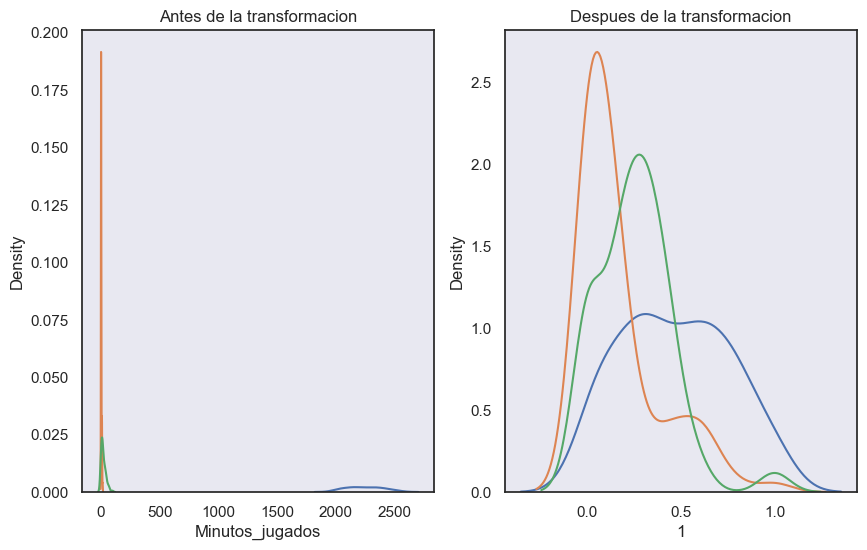

In [43]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

ax1.set_facecolor('#E8E8F1')
ax2.set_facecolor('#E8E8F1')

ax1.set_title('Antes de la transformacion')
sns.kdeplot(players_df['Minutos_jugados'], ax=ax1)
sns.kdeplot(players_df['Goles'], ax=ax1)
sns.kdeplot(players_df['Tiros'], ax=ax1)
ax2.set_title('Despues de la transformacion')
sns.kdeplot(X_norm[1], ax=ax2)
sns.kdeplot(X_norm[2], ax=ax2)
sns.kdeplot(X_norm[8], ax=ax2)
plt.show()

In [44]:
# genera los PCA para generar el modelo
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [46]:
from sklearn.cluster import KMeans
# specify the number of clusters
kmeans = KMeans(n_clusters=4)
# fit the input data
kmeans = kmeans.fit(reduced)
# get the cluster labels
labels = kmeans.predict(reduced)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()

In [47]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-0.026806,-0.647470,0,Igor Zubeldia
1,0.716508,-0.093148,1,Damin Surez
2,0.911548,0.463565,3,Martin Odegaard
3,0.196220,0.405499,1,Jos Luis Morales
4,0.233436,-0.457278,0,Jorge Miramn


In [48]:
print(reduced.groupby('cluster').size())

cluster
0    31
1    25
2    16
3    12
dtype: int64


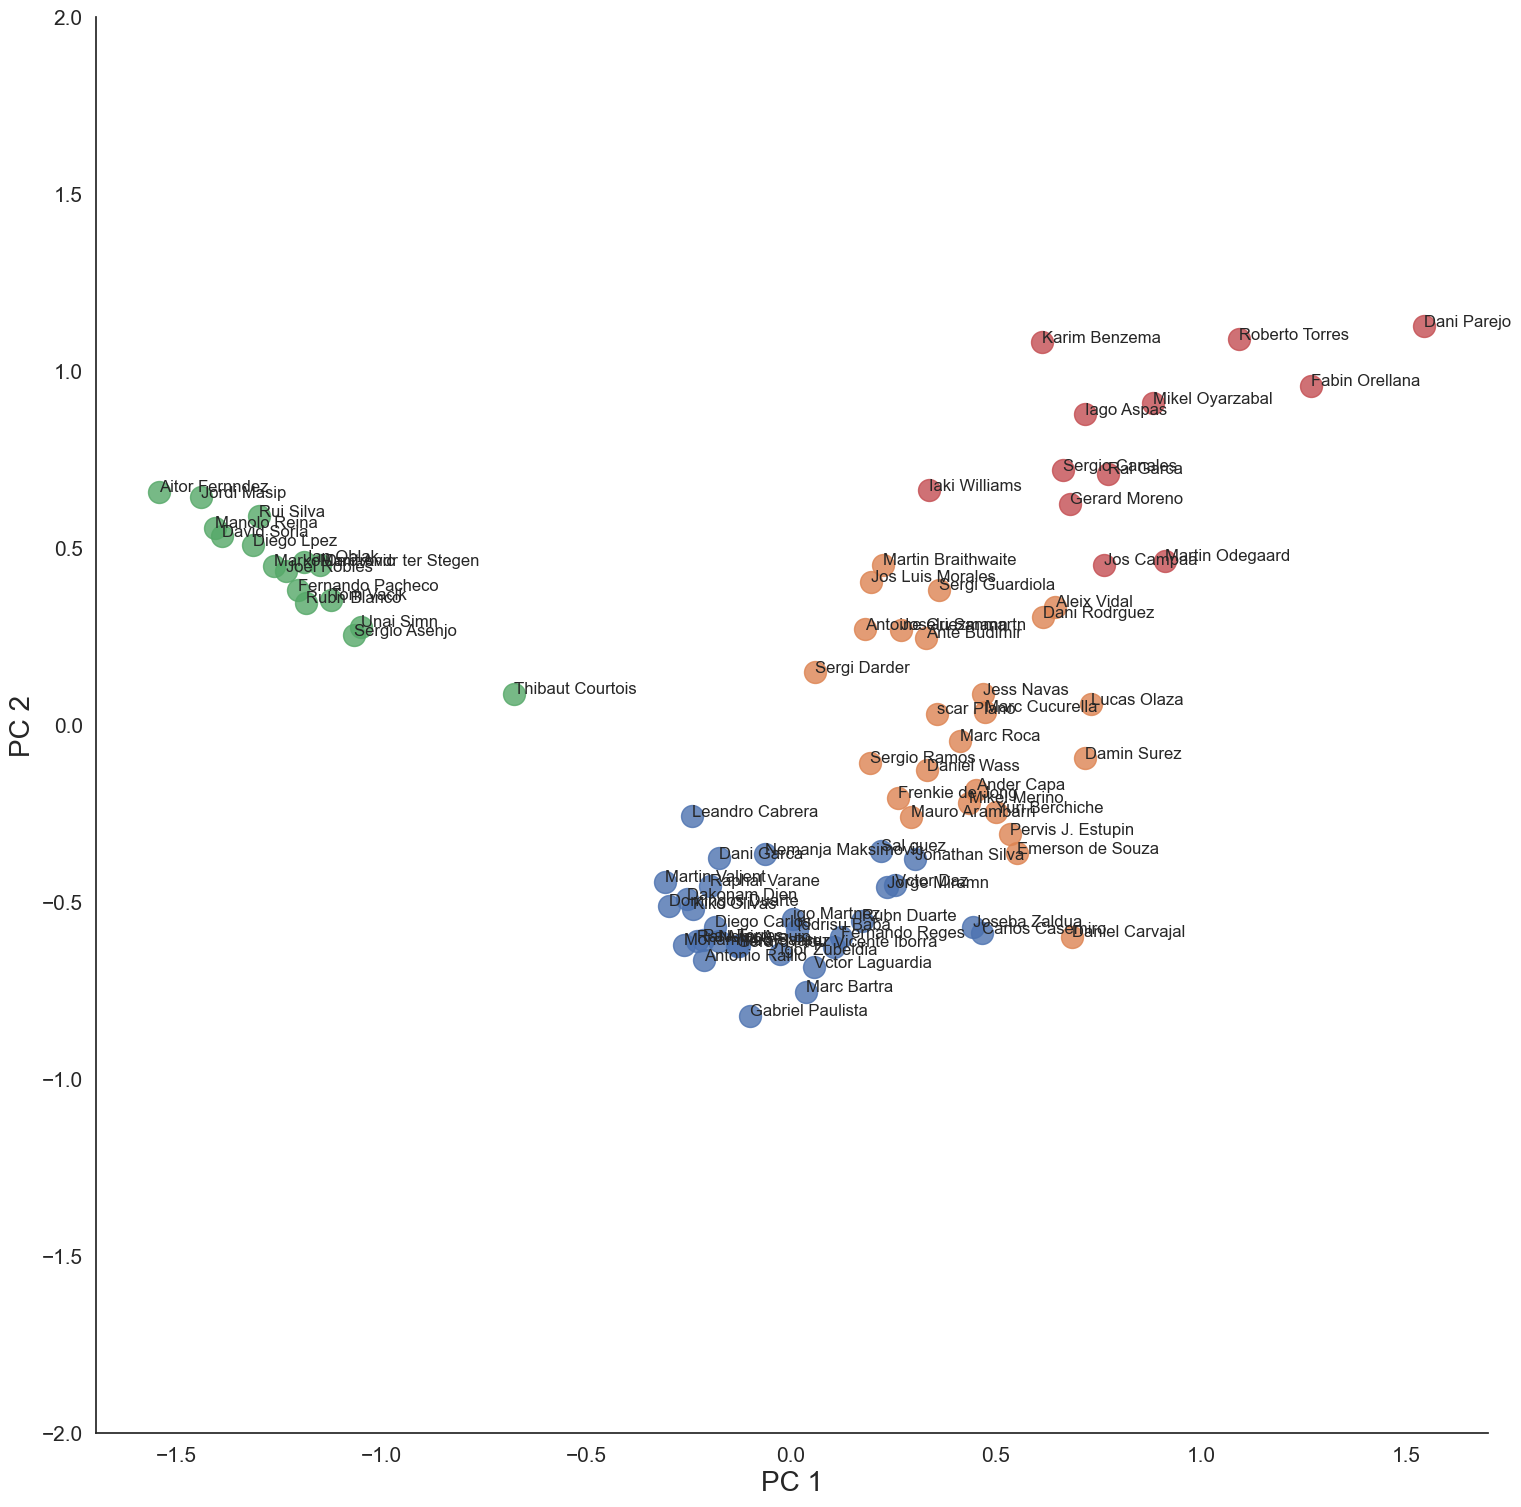

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
fit_reg=False, height = 15, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))
    ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)
plt.show()